In [1]:
from utilities import create_complete_dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### GET EXTENDED DATASET, RESEMBLE FIGURE FROM PAPER

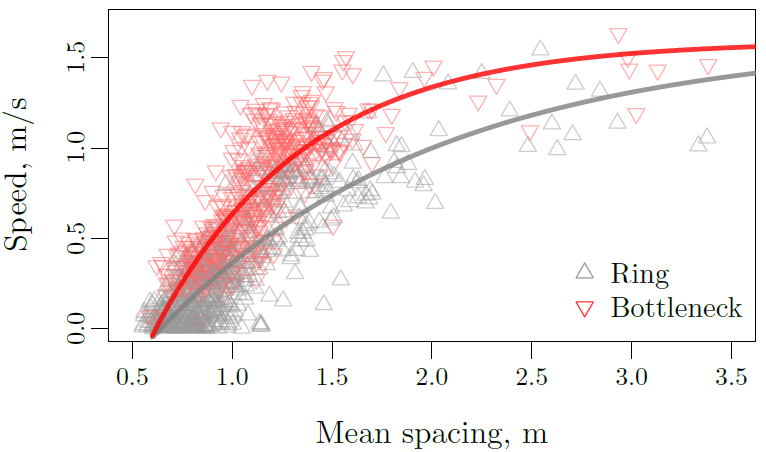

In [2]:
def fd_exec(m_s, v0, T, l):
    return v0 * (1 - np.exp((l - m_s) / (v0 * T)))

In [20]:
bottleneck_file = "../data/Pedestrian_Trajectories/Bottleneck_Data/uo-180-070.txt"
bottleneck_df = pd.read_csv(bottleneck_file, sep=" ", header=None, names=col_names)
bottleneck_df.describe()

,ID,FRAME,X,Y,Z
count,75336.000000,75336.000000,75336.000000,75336.000000,75336.000000
mean,90.639681,920.635818,91.864672,122.633047,172.207667
std,37.931602,347.609866,49.417536,363.875455,9.165959
min,1.000000,218.000000,-39.718800,-615.105000,150.540000
25%,63.000000,645.750000,52.379900,-188.726750,165.321000
50%,95.000000,905.000000,91.582600,106.012500,171.172000
75%,123.000000,1174.000000,133.386500,436.336500,180.478000
max,148.000000,1817.000000,255.047000,796.960000,197.812000


In [19]:
frame_old, pid_old = corridor_df.iloc[0]['FRAME'], corridor_df.iloc[0]['ID']
for i, r in corridor_df.iloc[1:].iterrows():
    frame, pid = r['FRAME'], r['ID']
    if frame-frame_old != 1 and pid == pid_old:
        print(r)
    frame_old, pid_old = frame, pid

In [3]:
corridor_file = "../data/corridor_15_complete_dataframe_2"
column_names = ['ID', 'FRAME', 'X', 'Y', 'MEAN_SPACING', 'OTHER_POSITIONS', 'SPEED']
corridor_df = pd.read_csv(corridor_file, header=None, sep=" ", names=column_names)
corridor_df.head()
# extended_corridor_df = create_complete_dataframe(corridor_file)
# extended_corridor_df['MEAN_SPACING'] = extended_corridor_df['MEAN_SPACING'].astype(float)

,ID,FRAME,X,Y,MEAN_SPACING,OTHER_POSITIONS,SPEED
0,1,0,0.402700,4.93493,4.973779,"[(1.34562, -0.0430272), (0.733364, -0.0278458)]",0.010423
1,1,1,0.403320,4.93513,4.974442,"[(1.3455199999999998, -0.0446244), (0.73243799...",0.002102
2,1,2,0.403451,4.93512,4.975822,"[(1.34541, -0.0472041), (0.7319910000000001, -...",0.002634
3,1,3,0.403600,4.93505,4.977122,"[(1.34588, -0.049963), (0.732301, -0.0312061)]",0.000668
4,1,4,0.403612,4.93509,4.977696,"[(1.3471199999999999, -0.0522853), (0.732988, ...",0.005751


Text(0, 0.5, 'v')

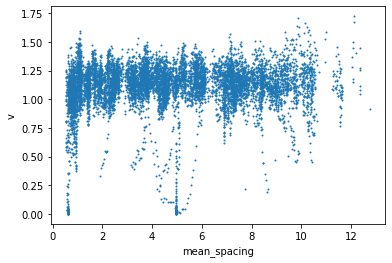

In [8]:
extended_corridor_df = corridor_df
speed_cm = extended_corridor_df['SPEED'].to_numpy()
mean_spacing_cm = extended_corridor_df['MEAN_SPACING'].to_numpy()
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
for m_s in mean_spacing_linspace:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)
plt.xlabel("mean_spacing")
plt.ylabel("v")

# ATTEMPT WITH WEBSITELOADER

In [34]:
tmpRawdata = np.loadtxt(corridor_file, delimiter=" ", skiprows=1)
d = {}
d['FRAME'] = tmpRawdata[:,0]
d['ID'] = tmpRawdata[:,1]
d['SPEED'] = tmpRawdata[:,2]
d['MEAN_SPACING'] = tmpRawdata[:,3]
d['KNN'] = tmpRawdata[:,4:]

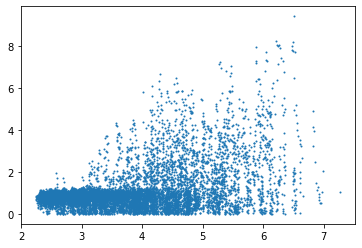

In [41]:
extended_corridor_df = d
speed_cm = extended_corridor_df['SPEED']
mean_spacing_cm = extended_corridor_df['MEAN_SPACING']
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
# mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
# for m_s in mean_spacing_linspace:
#     fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
# plt.scatter(mean_spacing_linspace, fd_res, s=1)
# plt.xlim(0,3.5)

In [5]:
c_f = "../data/processed_ug-180-030.txt"
tmpRawdata = np.loadtxt(c_f, delimiter=" ", skiprows=1)
d = {}
d['FRAME'] = tmpRawdata[:,0]
d['ID'] = tmpRawdata[:,1]
d['SPEED'] = tmpRawdata[:,2]
d['MEAN_SPACING'] = tmpRawdata[:,3]
d['KNN'] = tmpRawdata[:,4:]

(0.0, 3.5)

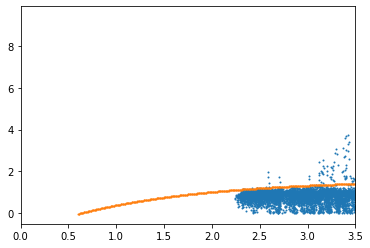

In [7]:
extended_corridor_df = d
speed_cm = extended_corridor_df['SPEED']
mean_spacing_cm = extended_corridor_df['MEAN_SPACING']
c_v0 = 1.6
c_T = 0.86
c_l = 0.64
fd_res = []
mean_spacing_linspace = np.linspace(0.6, max(mean_spacing_cm), 1000)
for m_s in mean_spacing_linspace:
    fd_res.append(fd_exec(m_s, c_v0, c_T, c_l))
plt.scatter(mean_spacing_cm, speed_cm, s=1)
plt.scatter(mean_spacing_linspace, fd_res, s=1)
plt.xlim(0,3.5)